In [1]:
!pip install -U albumentations
!pip install pytorch-lightning
!pip install torchinfo

from google.colab import drive
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
from PIL import Image
from pathlib import Path

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchmetrics.classification import Accuracy, BinaryAccuracy

import albumentations as A
from albumentations.pytorch import ToTensorV2
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import TQDMProgressBar

from torchinfo import summary
from tqdm import tqdm_notebook as tqdm

drive.mount('/content/drive')
! gdown 1jA6xtsUnhm9evBFqLsE9qauaeQFLEMWE
! unzip -n -qq /content/data.zip -d /content/data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Downloading...
From (original): https://drive.google.com/uc?id=1jA6xtsUnhm9evBFqLsE9qauaeQFLEMWE
From (redirected): https://drive.google.com/uc?id=1jA6xtsUnhm9evBFqLsE9qauaeQFLEMWE&confirm=t&uuid=7e3f2e43-5cf3-4396-937c-60e73d810769
To: /content/data.zip
100% 691M/691M [00:02<00:00, 237MB/s]


In [2]:
! pip uninstall tensorboard
! pip install tensorboard

Found existing installation: tensorboard 2.18.0
Uninstalling tensorboard-2.18.0:
  Would remove:
    /usr/local/bin/tensorboard
    /usr/local/lib/python3.11/dist-packages/tensorboard-2.18.0.dist-info/*
    /usr/local/lib/python3.11/dist-packages/tensorboard/*
Proceed (Y/n)? y
  Successfully uninstalled tensorboard-2.18.0
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
Using cached tensorboard-2.18.0-py3-none-any.whl (5.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.17.1 requires tensorboard<2.18,>=2.17, but you have tensorboard 2.18.0 which is incompatible.


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name           | Type           | Params | Mode 
----------------------------------------------------------
0 | model          | Sequential     | 4.0 M  | train
1 | dropout        | Dropout        | 0      | train
2 | fc             | Sequential     | 4.4 M  | train
3 | pred           | Linear         | 128    | train
4 | train_accuracy | BinaryAccuracy | 0      | train
5 | val_accuracy   | BinaryAccuracy | 0      | train
6 | test_accuracy  | BinaryAccuracy | 0      | train
----------------------------------------------------------
8.3 M     Trainable params
0         Non-trainable params
8.3 M     Total params
3

Девайс:  cuda

Data path:  /content/data

Длина n_train, n_val, n_test:  11250 2500 12494

Данные модели:  BinaryClassificationModel(
  (model): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=30` reached.


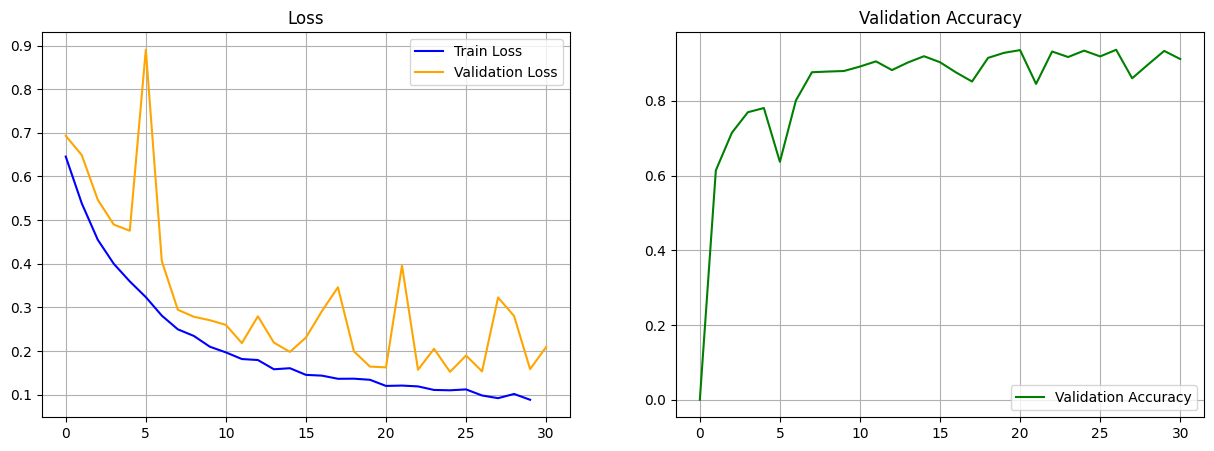

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│       test_accuracy       │    0.9131582975387573     │
│         test_loss         │    0.21748337149620056    │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.21748337149620056, 'test_accuracy': 0.9131582975387573}]


In [7]:
!pip install -U albumentations
!pip install pytorch-lightning
!pip install torchinfo

from google.colab import drive
from matplotlib import pyplot as plt
import numpy as np
import os
import cv2
from PIL import Image
from pathlib import Path

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchmetrics.classification import Accuracy, BinaryAccuracy

import albumentations as A
from albumentations.pytorch import ToTensorV2
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import TQDMProgressBar

from torchinfo import summary
from tqdm import tqdm_notebook as tqdm

drive.mount('/content/drive')
! gdown 1jA6xtsUnhm9evBFqLsE9qauaeQFLEMWE
! unzip -n -qq /content/data.zip -d /content/data

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print('Девайс: ',device)
print()

# Image size: even though image sizes are bigger than 96, we use this to speed up training
SIZE_H = SIZE_W = 256  # 128 / 192
N_CHANNELS = 3

# B G R
# Images mean and std channelwise : ImageNet DB
image_mean = [0.485, 0.456, 0.406]
image_std = [0.229, 0.224, 0.225]

# Path to a directory with image dataset and subfolders for training, validation and final testing
DATA_PATH = Path("data").resolve()
print('Data path: ', DATA_PATH)
print()

# Batch size: for batch gradient descent optimization, usually selected as 2**K elements
BATCH_SIZE = 128

# Number of threads for data loader
NUM_WORKERS = 2 # 2 is optimal for google colab, for local machine use 4

learning_rate = 1e-3

def albumentations_transform(image):
    image = np.array(image) # Преобразуем PIL.Image в numpy array

    transformer = A.Compose([
        A.Resize(SIZE_H, SIZE_W),
        A.Rotate(limit=30, p=0.5),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.3),
        A.Perspective(scale=(0.05, 0.1), p=0.5),
        A.ColorJitter(p=0.5),
        A.RandomGamma(gamma_limit=(80, 120), p=0.5),
        A.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
        ToTensorV2()
    ])
    transformed = transformer(image=image)
    return transformed["image"]

train_dataset = torchvision.datasets.ImageFolder(
    os.path.join(DATA_PATH, "train_11k"), transform=albumentations_transform
)
val_dataset = torchvision.datasets.ImageFolder(
    os.path.join(DATA_PATH, "val"), transform=albumentations_transform
)
test_dataset = torchvision.datasets.ImageFolder(
    os.path.join(DATA_PATH, "test_labeled"), transform=albumentations_transform
)
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=NUM_WORKERS,
)
val_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
)
test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
)

n_train, n_val, n_test = len(train_dataset), len(val_dataset), len(test_dataset)
print('Длина n_train, n_val, n_test: ', n_train, n_val, n_test)
print()

def conv_block_3x3(in_channels, out_channels, stride=1):
    return nn.Sequential(
        nn.Conv2d(in_channels, out_channels, 3, stride=stride, padding=1, bias=False),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(),
    )

class BinaryClassificationModel(pl.LightningModule):
    def __init__(self, learning_rate=learning_rate):
        super(BinaryClassificationModel, self).__init__()

        self.model = nn.Sequential(
            conv_block_3x3(N_CHANNELS, 64),
            nn.MaxPool2d(2),  # 256 -> 128
            conv_block_3x3(64, 64),
            nn.MaxPool2d(2),  # 128 -> 64
            conv_block_3x3(64, 64),
            nn.MaxPool2d(2),  # 64 -> 32
            conv_block_3x3(64, 128),
            nn.MaxPool2d(2),  # 32 -> 16
            conv_block_3x3(128, 256),
            nn.MaxPool2d(2),  # 16 -> 8
            conv_block_3x3(256, 512),
            nn.MaxPool2d(2),  # 8 -> 4
            conv_block_3x3(512, 512),
            nn.Flatten()
        )

        self.dropout = nn.Dropout(p=0.3)

        self.fc = nn.Sequential(
            nn.Linear(512 * 4 * 4, 512, bias=False),  # 512 * 4 * 4 = 8192
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(512, 256, bias=False),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(256, 128, bias=False),
            nn.BatchNorm1d(128),
            nn.ReLU(),
        )

        self.pred = nn.Linear(128, 1, bias=False)

        self.learning_rate = learning_rate

        # Метрики
        self.train_accuracy = BinaryAccuracy()
        self.val_accuracy = BinaryAccuracy()
        self.test_accuracy = BinaryAccuracy()

        self.train_loss_history = []
        self.val_loss_history = []
        self.val_acc_history = []

        self.train_loss_epoch = []
        self.val_loss_epoch = []
        self.val_acc_epoch = []

    def forward(self, x):
        x = self.model(x)
        x = self.dropout(x)
        x = self.fc(x)
        x = self.dropout(x)
        x = self.pred(x)
        return x

    def training_step(self, batch, batch_idx):
        images, labels = batch
        logits = self(images).squeeze()  # Убедимся, что logits имеет размерность [batch_size]
        loss = nn.BCEWithLogitsLoss()(logits, labels.float())  # labels должны быть float

        # Метрики
        probs = torch.sigmoid(logits)  # Получаем вероятности
        acc = self.train_accuracy(probs, labels)  # Используем вероятности для вычисления точности
        self.log("train_loss", loss, prog_bar=True)
        self.log("train_accuracy", acc, prog_bar=True)

        self.train_loss_epoch.append(loss.cpu().item())
        return loss

    def validation_step(self, batch, batch_idx):
        images, labels = batch
        logits = self(images).squeeze()  # Убедимся, что logits имеет размерность [batch_size]
        loss = nn.BCEWithLogitsLoss()(logits, labels.float())  # labels должны быть float

        # Метрики
        probs = torch.sigmoid(logits)  # Получаем вероятности
        acc = self.val_accuracy(probs, labels)  # Используем вероятности для вычисления точности
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_accuracy", acc, prog_bar=True)

        self.val_loss_epoch.append(loss.cpu().item())
        self.val_acc_epoch.append(acc.cpu().item())

    def test_step(self, batch, batch_idx):
        images, labels = batch
        logits = self(images).squeeze()  # Убедимся, что logits имеет размерность [batch_size]
        loss = nn.BCEWithLogitsLoss()(logits, labels.float())  # labels должны быть float

        # Метрики
        probs = torch.sigmoid(logits)  # Получаем вероятности
        acc = self.test_accuracy(probs, labels)  # Используем вероятности для вычисления точности
        self.log("test_loss", loss, prog_bar=True)
        self.log("test_accuracy", acc, prog_bar=True)

        return loss

    def on_train_epoch_end(self):
        avg_train_loss = sum(self.train_loss_epoch) / len(self.train_loss_epoch)
        self.train_loss_history.append(avg_train_loss)
        self.train_loss_epoch.clear()

    def on_validation_epoch_end(self):
        avg_val_loss = sum(self.val_loss_epoch) / len(self.val_loss_epoch)
        avg_val_acc = sum(self.val_acc_epoch) / len(self.val_acc_epoch)
        self.val_loss_history.append(avg_val_loss)
        self.val_acc_history.append(avg_val_acc)

        self.val_loss_epoch.clear()
        self.val_acc_epoch.clear()

    def configure_optimizers(self):
        return torch.optim.AdamW(self.parameters(), lr=self.learning_rate)


model = BinaryClassificationModel(learning_rate=learning_rate)
print('Данные модели: ', model)
print()

trainer = Trainer(
    max_epochs=30,
    devices=1,  # Используем один GPU или CPU
    accelerator='gpu',
    enable_progress_bar=True,
    callbacks=[TQDMProgressBar()]
)

def plot_train_process(train_loss, val_loss, val_accuracy):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    axes[0].set_title("Loss")
    axes[0].plot(train_loss, label="Train Loss", color="blue")
    axes[0].plot(val_loss, label="Validation Loss", color="orange")
    axes[0].legend()
    axes[0].grid()

    axes[1].set_title("Validation Accuracy")
    axes[1].plot(val_accuracy, label="Validation Accuracy", color="green")
    axes[1].legend()
    axes[1].grid()

    plt.show()


trainer.fit(model, train_loader, val_loader)

plot_train_process(
    train_loss=model.train_loss_history,
    val_loss=model.val_loss_history,
    val_accuracy=model.val_acc_history
)
test_results = trainer.test(model, test_loader)
print(test_results)